In [1]:
using Plots
pyplot()

Plots.PyPlotBackend()

# Algoritmos
Un **algoritmo** consiste en una serie de instrucciones para que la computadora lleve acabo un cálculo en específico.

Algunos algoritmos pueden llevar a cabo el cálculo en un número finito de pasos. En general esto no es cierto. Cuando no existe un procedimiento que nos de un resultado *exacto* en un número de pasos finitos, se emplea un *algoritmo iterativo*.

## Algoritmos Iterativos

Se comienza con una adivinanza $x_0$ y se le aplica un algoritmo/receta matemática/función *f* para producir el siguiente paso: $x_1 := f(x_0)$. Esto se repite cuantas veces sea necesario

$$ x_{n+1} := f(x_n)$$

con la esperanza que en el límite $n\rightarrow\infty$ el procedimiento converga a un valor $x^*$. Debido a que nos es imposible hacer una iteración infinita debemos definir cierta *tolerancia*; todos los algoritmos iterativos requieren de una condición de término.

### Qué es y qué no es un algoritmo?
09
18
27
36

## Bucle `while `
Es una iteración infinita

```julia
while  <condición>
    <cuerpo de la iteración>
end
```

In [6]:
function cuenta(n)
    while n>0
        println(n)
        n -= 1 # equivalente n = n -1 
        if n==3
            break
        end
    end
    println("Allá voy")
end

cuenta (generic function with 1 method)

In [4]:
cuenta(10)

10
9
8
7
6
Allá voy


## `break`
Corta la iteración y seguimos con la línea de código después del `end` de la iteración

## `continue`
Cortar la iteración que se está ejecutando y salta al siguiente paso de la iteración

In [7]:
cuenta(15)

15
14
13
12
11
10
9
8
7
6
5
4
Allá voy


In [15]:
function cuentac(n)
    while n>0
        if n%3 == 0
            n -= 1
            continue  #regresar al principio del loop
        end
        println(n)
        n -= 1 # equivalente n = n -1 
        continue #no hace nada porque está al final del while
    end
    println("Allá voy")
end

cuentac (generic function with 1 method)

In [16]:
cuentac(14)

14
13
11
10
8
7
5
4
2
1
Allá voy


## Algoritmo Babilónico

También conocido como método de Newton para calcular la raíz cuadrada de un número real $\sqrt{y}$

$$x_{n+1} = \frac{1}{2}(x_n+\frac{y}{x_n})$$

Queremos calcular $\sqrt{2}$, comenzamos adivinando con $x_0=1$

In [17]:
x0 = 1
radicando=2
y=0.5*(x0+radicando/x0)

1.5

In [18]:
x0=y
y=0.5*(x0+radicando/x0)

1.4166666666666665

In [19]:
x0=y
y=0.5*(x0+radicando/x0)


1.4142156862745097

In [20]:
ans/radicando^.5

1.0000015018250927

In [52]:
#Tolerancia 
function m_babilo(radicando,xn,ϵ=10e-4)
    xn1=0
    while abs(radicando-xn^2)>ϵ
        xn1=(xn+radicando/xn)*.5
        xn=xn1
    
    end
    println(xn," ",xn1)
    
    return xn
end

m_babilo (generic function with 2 methods)

In [54]:
m_babilo(6,2,10e-6)

2.4494897959183675 2.4494897959183675


2.4494897959183675

In [56]:
xn1=9

9

In [57]:
m_babilo(8,1)

2.8284685718801468 2.8284685718801468


2.8284685718801468

In [58]:
xn1

9

In [37]:
ans-50.5

-24.25990099009901

In [60]:
m_babilo(11,1)^2

3.3166248052315686 3.3166248052315686


11.00000009867734

In [63]:
m_babilo(23,1,1e-8)

4.795831523329245 4.795831523329245


4.795831523329245

## Método de la bisección

Encontrar el tiempo de intesercción de una partícula en movimiento rectilíneo uniforme y otra que se mueve en un movimiento oscilatorio armónico

$$ cos(t) =x_0-vt$$

### Movimiento 

Vamos a visualizar el problema

In [34]:
mru(x0,v,t) = x0-v*t

mru (generic function with 1 method)

In [35]:
x0=0; v0=-10; v1=10; x1=5;


5

In [7]:
t=0:0.1:5

0.0:0.1:5.0


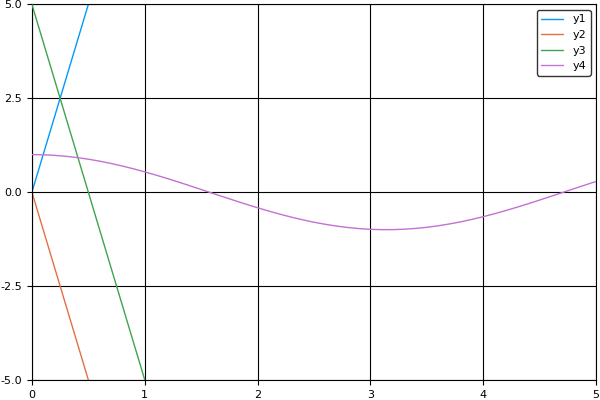

In [11]:
plot(t,mru(x0,v0,t))
plot!(t,mru(x0,v1,t))
plot!(t,mru(x1,v1,t))
plot!(t,cos(t),ylim=(-5,5))

El problema se reduce a obtener la raíz de la función 


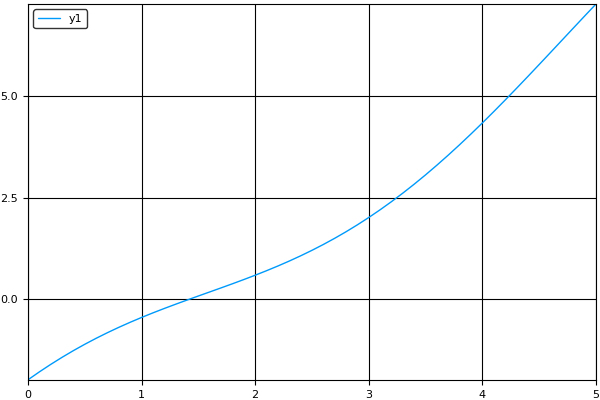

In [12]:
F(x)=cos(x)-mru(3,2,x)

plot(t,F(t))

Si *F* es continua, una condición suficiente para que exista la raiz en un intervalo $[a,b]$ es que cambie el signo de $F$, *F(a)* y *F(b)* tengan singos opuestos. 

#### Podemos construir el siguiente procedimiento:

1. Ubicar el punto medio del intervalo 
$$ c = (a+b)/2$$

2. Revisar el signo de *F(c)* y compararlo con *F(a)* (o *F(b)*)
    * Si signo de F(c) es igual a F(a), el intervalo en el cual está la raiz [c,b]
    * Si signo de F(c) es distinto a F(a), la raiz está en [a,c]
    
y repetirlo las veces que sea necesario para acercarnos a la raiz. ¿Qué tan cerca queremos estar de la raíz?

In [45]:
a=1     #Analizando la gráfica, con ojímetro, seleccionamos a y b
b=2
ϵ=1e-4  #Que tan cerca queremos estar de la raíz
c=0     #se puede escoger casi cualquier c, EXCEPTO puntos cercanos a la raízb

0

Vamos a usar la función `sign()` para comparar los signos

In [36]:
?sign

search: sign signif signed Signed signbit significand Unsigned unsigned flipsign



```
sign(x)
```

Return zero if `x==0` and $x/|x|$ otherwise (i.e., ±1 for real `x`).


In [31]:

while abs(F(c))>ϵ
    c=0.5*(a+b)
    println(a," ",c, " ",b)
    if sign(F(c)) == sign(F(a))
        a=c
    else
        b=c
    end
    
end


1 1.5 2
1 1.25 1.5
1.25 1.375 1.5
1.375 1.4375 1.5
1.375 1.40625 1.4375
1.40625 1.421875 1.4375
1.421875 1.4296875 1.4375


In [32]:
F(c)

1.600666467696521e-5

## Otro ejemplo

Vamos a buscar la raiz de un polinomio cualquiera. Usando el código anterior, encapsulado en una función con los argumentos ... ...

In [32]:
function biseccion(a,b,F,ϵ=1e-4,max_i=10000)
    c=0
    i=0
    while abs(F(c))>ϵ && i<max_i
        i+=1
        c=0.5*(a+b)
        println(a," ",c, " ",b)
        if sign(F(c)) == sign(F(a))
            a=c
        else
            b=c
        end
    end
    print("La raiz( $(F(c)) ), está en $c")
end

biseccion (generic function with 4 methods)

In [42]:
F(t)=t.^3-20t.^2+10*t+5


F (generic function with 1 method)

Cuando usamos operadores más complicados debemos usar un punto, no  "{Array}^2" -> sí "{Array}.^2"

In [43]:
x=-10:0.1:10  #Para versiones más recientes x=[-10:0.1:10]
F(x)

201-element Array{Float64,1}:
 -3095.0  
 -3024.5  
 -2954.99 
 -2886.47 
 -2818.94 
 -2752.38 
 -2686.78 
 -2622.16 
 -2558.49 
 -2495.77 
 -2434.0  
 -2373.17 
 -2313.27 
     ⋮    
  -785.231
  -796.0  
  -806.629
  -817.112
  -827.443
  -837.616
  -847.625
  -857.464
  -867.127
  -876.608
  -885.901
  -895.0  

In [ ]:
plotly()
plot(x,F(x))

In [25]:
plot(x,F(x),xlim=(-2.5,2.5),ylim=(-50,5))


In [31]:
biseccion(0,2.5,F)

0 1.25 2.5
0 0.625 1.25
0.625 0.9375 1.25
0.625 0.78125 0.9375
0.78125 0.859375 0.9375
0.78125 0.8203125 0.859375
0.8203125 0.83984375 0.859375
0.8203125 0.830078125 0.83984375
0.830078125 0.8349609375 0.83984375
0.830078125 0.83251953125 0.8349609375
0.83251953125 0.833740234375 0.8349609375
0.833740234375 0.8343505859375 0.8349609375
0.8343505859375 0.83465576171875 0.8349609375
0.8343505859375 0.834503173828125 0.83465576171875
0.8343505859375 0.8344268798828125 0.834503173828125
0.8343505859375 0.8343887329101562 0.8344268798828125
0.8343887329101562 0.8344078063964844 0.8344268798828125
0.8344078063964844 0.8344173431396484 0.8344268798828125
La raiz(9.237718569465869e-5, está en 0.8344173431396484

In [33]:
biseccion(-2.5,-0.1,F)

-2.5 -1.3 -0.1
-1.3 -0.7000000000000001 -0.1
-0.7000000000000001 -0.4 -0.1
-0.4 -0.25 -0.1
-0.4 -0.325 -0.25
-0.325 -0.2875 -0.25
-0.325 -0.30625 -0.2875
-0.325 -0.31562500000000004 -0.30625
-0.31562500000000004 -0.31093750000000003 -0.30625
-0.31093750000000003 -0.30859375 -0.30625
-0.30859375 -0.307421875 -0.30625
-0.30859375 -0.3080078125 -0.307421875
-0.3080078125 -0.30771484375 -0.307421875
La raiz( -5.3972705267746335e-5 ), está en -0.30771484375

In [27]:
F(-0.30771484375)

-5.3972705267746335e-5